In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True)
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True)

In [2]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
newsgroups_train.target.shape, newsgroups_train.filenames.shape

((11314,), (11314,))

In [9]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)


In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/allen/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [13]:
# Lemmatizer Example
print(WordNetLemmatizer().lemmatize('went', pos = 'v'))

go


In [16]:
# Stemmer Example
import pandas as pd
stemmer = SnowballStemmer("english")
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]

pd.DataFrame(data={'original word':original_words, 'stemmed':singles })

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [17]:
# stemmer example 2
from nltk.stem import PorterStemmer
ps = PorterStemmer()
singles = [ps.stem(plural) for plural in original_words]
pd.DataFrame(data={'original word':original_words, 'stemmed':singles })

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


In [18]:
'''
Write a function to perform the pre processing steps on the entire dataset
'''
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result


In [19]:
'''
Preview a document after preprocessing
'''
document_num = 50
doc_sample = 'This disk has failed many times. I would like to get it replaced.'

print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original document: 
['This', 'disk', 'has', 'failed', 'many', 'times.', 'I', 'would', 'like', 'to', 'get', 'it', 'replaced.']


Tokenized and lemmatized document: 
['disk', 'fail', 'time', 'like', 'replac']


In [20]:
processed_docs = []

for doc in newsgroups_train.data:
    processed_docs.append(preprocess(doc))

In [52]:
print(processed_docs[:3])

[['lerxst', 'thing', 'subject', 'nntp', 'post', 'host', 'organ', 'univers', 'maryland', 'colleg', 'park', 'line', 'wonder', 'enlighten', 'door', 'sport', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'small', 'addit', 'bumper', 'separ', 'rest', 'bodi', 'know', 'tellm', 'model', 'engin', 'spec', 'year', 'product', 'histori', 'info', 'funki', 'look', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst'], ['guykuo', 'carson', 'washington', 'subject', 'clock', 'poll', 'final', 'summari', 'final', 'clock', 'report', 'keyword', 'acceler', 'clock', 'upgrad', 'articl', 'shelley', 'qvfo', 'innc', 'organ', 'univers', 'washington', 'line', 'nntp', 'post', 'host', 'carson', 'washington', 'fair', 'number', 'brave', 'soul', 'upgrad', 'clock', 'oscil', 'share', 'experi', 'poll', 'send', 'brief', 'messag', 'detail', 'experi', 'procedur', 'speed', 'attain', 'rat', 'speed', 'card', 'adapt', 'heat', 'sink', 'hour', 'usag', 'floppi', 'disk', 'function', 'floppi', 'especi', 'request', 'summar', 'day',

In [22]:
dictionary = gensim.corpora.Dictionary(processed_docs)


In [23]:
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)


In [24]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [34]:
document_num = 0
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     dictionary[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 0 ("addit") appears 1 time.
Word 1 ("bodi") appears 1 time.
Word 2 ("bring") appears 1 time.
Word 3 ("bumper") appears 1 time.
Word 4 ("call") appears 1 time.
Word 5 ("colleg") appears 1 time.
Word 6 ("door") appears 2 time.
Word 7 ("earli") appears 1 time.
Word 8 ("engin") appears 1 time.
Word 9 ("enlighten") appears 1 time.
Word 10 ("histori") appears 1 time.
Word 11 ("info") appears 1 time.
Word 12 ("late") appears 1 time.
Word 13 ("maryland") appears 1 time.
Word 14 ("model") appears 1 time.
Word 15 ("neighborhood") appears 1 time.
Word 16 ("park") appears 1 time.
Word 17 ("product") appears 1 time.
Word 18 ("rest") appears 1 time.
Word 19 ("separ") appears 1 time.
Word 20 ("small") appears 1 time.
Word 21 ("spec") appears 1 time.
Word 22 ("sport") appears 1 time.
Word 23 ("wonder") appears 1 time.


In [64]:
lda_model =  gensim.models.LdaModel(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10)

In [65]:
'''
For each topic, we will explore the words occuring in that topic and its relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {}  \nWords: {}".format(idx,  topic ))
    print("\n")

Topic: 0  
Words: 0.024*"window" + 0.016*"file" + 0.012*"program" + 0.009*"imag" + 0.009*"version" + 0.008*"graphic" + 0.007*"softwar" + 0.007*"color" + 0.007*"avail" + 0.007*"server"


Topic: 1  
Words: 0.016*"drive" + 0.007*"card" + 0.006*"sale" + 0.006*"price" + 0.005*"control" + 0.005*"speed" + 0.005*"hard" + 0.005*"engin" + 0.005*"power" + 0.005*"bike"


Topic: 2  
Words: 0.006*"govern" + 0.006*"armenian" + 0.005*"kill" + 0.004*"live" + 0.004*"countri" + 0.004*"turkish" + 0.004*"happen" + 0.003*"american" + 0.003*"drug" + 0.003*"children"


Topic: 3  
Words: 0.014*"space" + 0.011*"nasa" + 0.007*"research" + 0.006*"program" + 0.005*"orbit" + 0.005*"center" + 0.004*"access" + 0.004*"launch" + 0.004*"cost" + 0.004*"earth"


Topic: 4  
Words: 0.018*"game" + 0.015*"team" + 0.011*"play" + 0.009*"player" + 0.007*"hockey" + 0.006*"season" + 0.005*"pitt" + 0.005*"leagu" + 0.005*"score" + 0.004*"pittsburgh"


Topic: 5  
Words: 0.011*"christian" + 0.007*"jesus" + 0.006*"exist" + 0.006*"israe

In [66]:
test_data = newsgroups_test.data[100]
print(test_data)

Subject: help
From: C..Doelle@p26.f3333.n106.z1.fidonet.org (C. Doelle)
Lines: 13

Hello All!

    It is my understanding that all True-Type fonts in Windows are loaded in
prior to starting Windows - this makes getting into Windows quite slow if you
have hundreds of them as I do.  First off, am I correct in this thinking -
secondly, if that is the case - can you get Windows to ignore them on boot and
maybe make something like a PIF file to load them only when you enter the
applications that need fonts?  Any ideas?


Chris

 * Origin: chris.doelle.@f3333.n106.z1.fidonet.org (1:106/3333.26)



In [67]:
bow_vector = dictionary.doc2bow(preprocess(test_data))
bow_vector

[(98, 1),
 (175, 1),
 (189, 1),
 (228, 1),
 (237, 1),
 (259, 1),
 (284, 1),
 (307, 1),
 (350, 1),
 (515, 1),
 (727, 1),
 (746, 1),
 (766, 2),
 (971, 1),
 (988, 4),
 (1025, 1),
 (1072, 2),
 (1075, 2),
 (1095, 1),
 (1951, 1),
 (3114, 1),
 (3462, 1),
 (3983, 2)]

In [68]:
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.8447186350822449	 Topic: 0.024*"window" + 0.016*"file" + 0.012*"program" + 0.009*"imag" + 0.009*"version"
Score: 0.13102930784225464	 Topic: 0.011*"christian" + 0.007*"jesus" + 0.006*"exist" + 0.006*"israel" + 0.005*"bibl"


In [69]:
newsgroups_test.target[100]

2

In [70]:
lda_model[bow_vector]

[(0, 0.8475513), (1, 0.08196359), (6, 0.050275523)]

In [71]:
test_results = []
for test_data in newsgroups_test.data:
    bow_vector = dictionary.doc2bow(preprocess(test_data))
    cur_res = []
    for idx, score in sorted(lda_model.get_document_topics(bow_vector), key=lambda x:x[-1]):
        cur_res.append((idx,score))
    test_results.append(lda_model.get_document_topics(bow_vector))
test_results[:10]

[[(1, 0.7047592), (5, 0.26840913)],
 [(0, 0.41672188), (2, 0.05826571), (4, 0.46681583), (7, 0.044973686)],
 [(5, 0.96348417)],
 [(1, 0.050146062), (2, 0.55377364), (5, 0.386433)],
 [(1, 0.099095285), (5, 0.88300955)],
 [(0, 0.086151354), (2, 0.749731), (3, 0.017955739), (5, 0.14415649)],
 [(1, 0.31932276), (5, 0.6305767)],
 [(0, 0.5045507), (1, 0.110603966), (5, 0.3646423)],
 [(0, 0.85643226), (3, 0.11222688)],
 [(0, 0.57184684), (2, 0.16444173), (3, 0.17963389), (4, 0.07341287)]]

In [72]:
topic_terms = lda_model.state.get_lambda()
topic_terms

array([[9.45298462e+01, 3.41975632e+01, 2.31223030e+01, ...,
        1.25005156e-01, 1.90780830e+01, 1.03705606e+01],
       [1.05938354e+02, 4.09410782e+01, 2.24000854e+01, ...,
        1.25347346e-01, 1.25056431e-01, 1.25118792e-01],
       [7.95012207e+01, 2.80495789e+02, 2.76492371e+02, ...,
        1.25052765e-01, 1.26155943e-01, 1.25432745e-01],
       ...,
       [4.14180222e+01, 1.90296448e+02, 1.70932220e+02, ...,
        3.08533597e+00, 1.18619213e+01, 2.09996490e+01],
       [2.22819748e+01, 1.25129461e-01, 1.25595391e-01, ...,
        1.25094965e-01, 1.25572443e-01, 1.25197843e-01],
       [1.25884003e+02, 4.45319271e+00, 4.57216988e+01, ...,
        1.25047982e-01, 1.25205249e-01, 1.25323966e-01]], dtype=float32)

In [58]:
np.sum(topic_terms, axis=0)

array([599.77625 , 655.0666  , 712.23584 , ...,  27.578348,  25.505468,
        32.52907 ], dtype=float32)

In [60]:
topic_terms[0].shape

(6535,)

In [73]:
results_processed = np.zeros((len(test_results), 8))

In [74]:
for idx, test_vector in enumerate(test_results):
    for t in test_vector:
        results_processed[idx][t[0]] = t[1]
results_processed

array([[0.        , 0.70475918, 0.        , ..., 0.26840913, 0.        ,
        0.        ],
       [0.41672188, 0.        , 0.05826571, ..., 0.        , 0.        ,
        0.04497369],
       [0.        , 0.        , 0.        , ..., 0.96348417, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06630556, ..., 0.13101774, 0.23770048,
        0.        ],
       [0.19589737, 0.58972406, 0.        , ..., 0.        , 0.        ,
        0.06413827],
       [0.        , 0.        , 0.        , ..., 0.85886282, 0.        ,
        0.12515223]])

In [75]:
from sklearn.manifold import TSNE
result_tsne = TSNE(n_components=2).fit_transform(results_processed)
result_tsne.shape

(7532, 2)

In [77]:
len(newsgroups_test.target)

7532

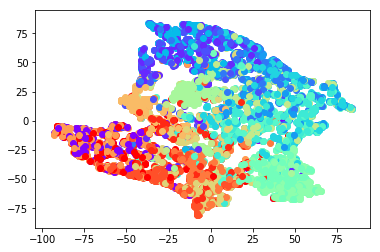

In [86]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 20))
plot_colors = [colors[t] for t in newsgroups_test.target]
import matplotlib.pyplot as plt
for i in range(len(plot_colors)):
    plt.scatter(result_tsne[i][0], result_tsne[i][1], color=plot_colors[i])
# plt.show()

In [84]:
newsgroups_test.target

array([ 7,  5,  0, ...,  9,  6, 15])

In [87]:
plt.savefig('LDA_cluster.png')

<Figure size 432x288 with 0 Axes>